# Confidence Intervals

## Related files:
- dc_bikes_clean.csv

## Import package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# read csv
df = pd.read_csv('../data/dc_bikes_clean.csv', parse_dates = True, index_col = 0)
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,day,day_name,hour,minute,part_of_the_day
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,1,Saturday,0,0,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,Saturday,1,0,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,1,Saturday,2,0,night


In [33]:
df_subset = df[df['weather'] == 4]
df_subset['weather'].value_counts()

4    3
Name: weather, dtype: int64

## For the bikes data set, calculate the 95% confidence intervals for the mean of the windspeed feature using bootstrapping. Create a notebook in which following questions shall be solved:

### 1. Initialize empty list called `sample_means()`

In [3]:
sample_means = []

### 2. Create a `for loop` that will loop 10,000 times

### 3. In each iteration using the pandas method `.sample()` sample 100 windspeeds with replacement

### 4. Also in that same iteration take the mean of these 100 samples and then append it to the `sample_means` list

In [4]:
windspeed_sample = df['windspeed']
windspeed_sample

for _ in range(10_000):
    bootstrap_sample = windspeed_sample.sample(n = 100, replace='True')
    sample_means += [bootstrap_sample.mean()]
    # sample_means.append(bootstrap_sample.mean()) # alternatively, .append() also works

### 5. Using `sns.displot` plot the distribution of the `sample_means` list

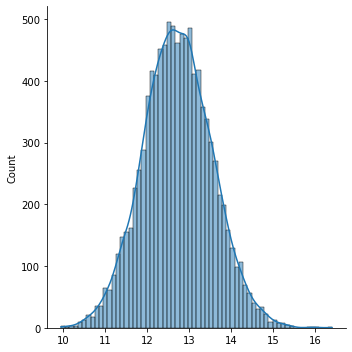

In [5]:
sns.displot(sample_means, kde = True);

### 6. Convert `sample_means` list to pandas `Series`

In [12]:
sample_means = pd.Series(sample_means)
sample_means

0       13.520064
1       12.180399
2       11.840240
3       13.579828
4       13.350420
          ...    
9995    12.360227
9996    14.140484
9997    12.490341
9998    12.390310
9999    12.790434
Length: 10000, dtype: float64

### 7. Using pandas `.quantile()` calculation the upper (0.975) and lower (0.025) limits of the confidence interval of the sample_means list


In [7]:
# defining confidence intervals
alpha = 0.95
lower_quantile = (1-alpha)/2
upper_quantile = alpha + lower_quantile
print(alpha, lower_quantile, upper_quantile)


# calculating the sample's lower and upper limit
lower_limit = sample_means.quantile(lower_quantile)
upper_limit = sample_means.quantile(upper_quantile)
print(f'The confidence interval of the average windspeed is between {lower_limit} and {upper_limit}')

0.95 0.025000000000000022 0.975
The confidence interval of the average windspeed is between 11.140492000000005 and 14.360378000000003


---
## Bonus

### 8. Calculate using the `z-value` formula

In [8]:
# calculate mean of windspeed:
sample_mean = windspeed_sample.mean()

# calculate std:
sample_std = windspeed_sample.std()

print(sample_mean, sample_std)

12.736539622533575 8.196795314377253


In [9]:
# alpha = 0.95, then z = 1.96 and n=100

z = 1.96
n = 100

lower_limit_eq = sample_mean - z * (sample_std / np.sqrt(n))
upper_limit_eq = sample_mean + z * (sample_std / np.sqrt(n))

print(f'The confidence interval of the average sepal length of iris setosa is between {lower_limit_eq} and {upper_limit_eq}')
    # We are 95% confient that the true mean lies between the lower and upper limit

The confidence interval of the average sepal length of iris setosa is between 11.129967740915633 and 14.343111504151517


### 9. Compare to the results of the bootstrapping method

In [10]:
## compare both methods results

print(f'The confidence interval of the average sepal length of iris setosa is between {lower_limit} and {upper_limit}')

The confidence interval of the average sepal length of iris setosa is between 11.140492000000005 and 14.360378000000003


---

## Additional Analysis

In [34]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,day,hour,minute
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.0
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,36.021955,155.552177,188.612693,2011.502561,2.512055,6.537775,15.683411,11.546752,0.0
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.960477,151.039033,177.615724,0.500008,1.114108,3.438776,8.789373,6.914405,0.0
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,1.000000,0.000000,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,2.000000,4.000000,8.000000,6.000000,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000,143.000000,2012.000000,3.000000,7.000000,16.000000,12.000000,0.0
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,49.000000,222.000000,279.000000,2012.000000,4.000000,10.000000,23.000000,18.000000,0.0
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,1053.000000,2012.000000,4.000000,12.000000,31.000000,23.000000,0.0


with n = 1000

#### CI for TEMP

In [21]:
# create subset
temp_sample = df['temp']
temp_sample

# calculate mean of temp:
sample_mean = temp_sample.mean()

# calculate std:
sample_std = temp_sample.std()

print(sample_mean, sample_std)

# alpha = 0.95, then z = 1.96 and n=1000

z = 1.96
n = 1000

lower_limit_eq = sample_mean - z * (sample_std / np.sqrt(n))
upper_limit_eq = sample_mean + z * (sample_std / np.sqrt(n))

print(f'The confidence interval of the average temp is between {lower_limit_eq} and {upper_limit_eq}')
    # We are 95% confient that the true mean lies between the lower and upper limit

20.3764739052879 7.894800971238327
The confidence interval of the average temp is between 19.887149071528576 and 20.86579873904722


#### CI for COUNT

In [20]:
# create subset
count_sample = df['count']
count_sample

# calculate mean of count:
sample_mean = count_sample.mean()

# calculate std:
sample_std = count_sample.std()

print(sample_mean, sample_std)

# alpha = 0.95, then z = 1.96 and n=1000

z = 1.96
n = 1000

lower_limit_eq = sample_mean - z * (sample_std / np.sqrt(n))
upper_limit_eq = sample_mean + z * (sample_std / np.sqrt(n))

print(f'The confidence interval of the average count is between {lower_limit_eq} and {upper_limit_eq}')
    # We are 95% confient that the true mean lies between the lower and upper limit

188.61269348063755 177.61572359005345
The confidence interval of the average count is between 177.60395687848958 and 199.6214300827855


#### CI for WEATHER

In [22]:
# create subset
weather_sample = df['weather']
weather_sample

# calculate mean of weather:
sample_mean = weather_sample.mean()

# calculate std:
sample_std = weather_sample.std()

print(sample_mean, sample_std)

# alpha = 0.95, then z = 1.96 and n=1000

z = 1.96
n = 1000

lower_limit_eq = sample_mean - z * (sample_std / np.sqrt(n))
upper_limit_eq = sample_mean + z * (sample_std / np.sqrt(n))

print(f'The confidence interval of the average weather is between {lower_limit_eq} and {upper_limit_eq}')
    # We are 95% confient that the true mean lies between the lower and upper limit
    # 1: 11413, 2: 4544, 3: 1419 4: 3 ---> this shows that majority of the time, there is 'clear' weather

1.425283387997008 0.6393568777543036
The confidence interval of the average weather is between 1.3856556381576182 and 1.4649111378363977
